<div class="alert alert-block alert-info">
    

__Комментари гео__

 
— модуль folium для визуализации геоданных на карте — https://dev-gang.ru/article/interaktivnaja-vizualizacija-geo-dannyh-na-python-9yqzq8qlud/  
— модуль для сервиса Геокодер от Яндекса: https://pypi.org/project/yandex-geocoder/  
— модуль для сервиса замечательной российской компании Dadata: https://pypi.org/project/dadata/  


</div>

# А/В тест 

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

 **Цель исследования**
 
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

 **Ход исследования**
 
Данные для первой части:

 Файл /datasets/hypothesis.csv
 
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части:

Файл /datasets/orders.csv

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [47]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from pymystem3 import Mystem
# m = Mystem()

In [48]:
hypothesis, orders, visitors = (pd.read_csv('/datasets/hypothesis.csv'),
                                pd.read_csv('/datasets/orders.csv'),
                                pd.read_csv('/datasets/visitors.csv'))

In [49]:
#посмотрим загруженные данные
def all_info(df: pd.DataFrame):
    print("info")
    df.info(verbose=True)
    display( df.head(10)) 

In [50]:
all_info(hypothesis)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<div class="alert alert-block alert-warning">
    

__Комментарий __

Чтобы вывести полное название гипотез, можно использовать такой код:  
<code>pd.set_option('display.max_columns', None)  
pd.options.display.max_colwidth = 150  </code>
</div>

In [51]:
all_info(orders)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [52]:
all_info(visitors)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


##### комментарий: 
по результатам данных для более полного понимания нужно:
- привести названия столбцов к удобному формату ( строчные буквы везде)
- привести даты к формату дат


In [53]:
hypothesis.columns = hypothesis.columns.str.lower()

In [54]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [55]:
#проверила как даты исправились
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [56]:
dublicated = orders.groupby('visitorId').agg({'group': ['nunique', 'unique']})
dublicated.columns = ['group','names' ]
dublicated

,group,names
visitorId,,
5114589,1,[B]
6958315,1,[B]
8300375,2,"[B, A]"
11685486,1,[A]
39475350,1,[B]
...,...,...
4266935830,2,"[A, B]"
4278982564,1,[A]
4279090005,1,[B]


In [57]:
duplicated = dublicated.query('group>1')
duplicated.head(5)

,group,names
visitorId,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


In [58]:
duplicated['group'].value_counts()

2    58
Name: group, dtype: int64

In [59]:
#чистка пользователей
new_orders = orders.query('visitorId not in @duplicated.index')
new_orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


## Приоритизация гипотез

9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 
### Задача 1
Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.


In [60]:
hypothesis['ice'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.sort_values(by = 'ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### Задача 2

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [61]:
hypothesis['rice'] = hypothesis['impact']*hypothesis['confidence']*hypothesis['reach']/hypothesis['efforts']
hypothesis.sort_values(by = 'rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


In [62]:
#расширю ячейку чтобы видеть весь текст
pd.set_option('display.max_colwidth', 500)
hypothesis[['hypothesis', 'rice', 'ice']].sort_values(by = 'rice', ascending=False).round(2)

,hypothesis,rice,ice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.20
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.33
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.12
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.33
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.00


#### Вывод
после приоретизации гипотез разными методами, гипотезы поменялись местами. Если при ICE топ была гипотеза "Запустить акцию, дающую скидку на товар в день рождения" под номеров 8 в отчете, то в случае метода RICE она на 5-м месте. В фреймворке RICE мы учитываем  параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"  и 	"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" он очень высок (в 7 он =10,  в лидере ICE -  он минимальный =1). Если этот параметр возможно посчитать, его необходимо учитывать при приоретизации.

## Анализ A/B-теста

Проанализируйте A/B-тест:

Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

### Задача 1

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения. 
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

In [63]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
453,3075639014,351125977,2019-08-06,4485,A
1024,3845118557,1964413493,2019-08-31,160,B
576,2724331495,4279090005,2019-08-04,6716,B


In [64]:
visitors.sample(3)

,date,group,visitors
24,2019-08-25,A,621
34,2019-08-04,B,770
4,2019-08-05,A,756


In [65]:
#проверим распределение по группам в заказах
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

создадим датафрейм datesGroups с уникальными парами значений 'date' и 'group', таблицы orders. Удалим дубликаты методом drop_duplicates().

In [66]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(3)

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A


Создадим таблицу cumulativeData куммулятивных данных по обеим таблицам
объявляем переменную ordersAggregated, содержащую:
- дату;
- группу A/B-теста;
- число уникальных транзакций в группе теста по указанную дату включительно;
- число уникальных пользователей, совершивших хотя бы 1 транзакцию в группе теста по указанную дату включительно;
- суммарную выручку заказов в группе теста по указанную дату включительно

и

visitorsAggregated, содержащую:
- дату;
- группу A/B-теста;
- количество уникальных посетителей в группе теста по указанную дату включительно.

In [67]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : 'nunique',
'visitorId' : 'nunique',
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [68]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [69]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [70]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()
#средняя выручка за день в каждой группе

group
A    112473
B    147274
Name: revenue, dtype: int64

In [71]:
cumulativeData.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    2078908
B    2539635
Name: revenue, dtype: int64

Объявим переменные cumulativeRevenueA и cumulativeRevenueB, в которых сохраните данные о датах, выручке и числе заказов в группах A и B.
Далее построим графики кумулятивной выручки по дням по группам.

/tmp/ipykernel_36/3594970917.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.annotate('скачок', xy=((pd.datetime(2019,8,17)), 2800000), xytext=((pd.datetime(2019,8,17)), 3500000),
/tmp/ipykernel_36/3594970917.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.annotate('отрыв', xy=((pd.datetime(2019,8,5)), 800000), xytext=((pd.datetime(2019,8,17)), 2000000),


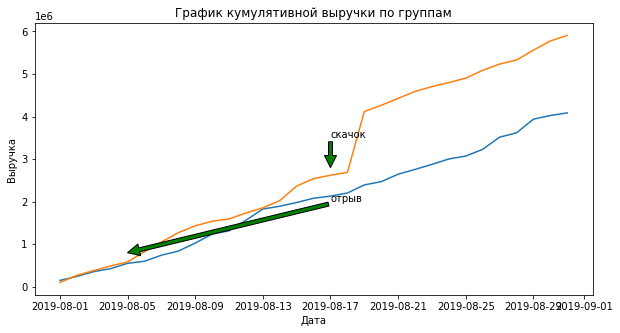

In [72]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# Строим график выручки группы А
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
 
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.annotate('скачок', xy=((pd.datetime(2019,8,17)), 2800000), xytext=((pd.datetime(2019,8,17)), 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=((pd.datetime(2019,8,5)), 800000), xytext=((pd.datetime(2019,8,17)), 2000000),
            arrowprops=dict(facecolor='g')) 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title(f'График кумулятивной выручки по группам')
plt.show()

##### комментарий: 
по графику видно, что в первую половину срока после теста выручка в группе В чуть больше, 13 августа данные сравнялись, далее значения в группе B стали еще выше за счет всплеска, связано это может быть с кол-вм заказов или чеком, который как раньше посмотрели в группе B выше.

<div class="alert alert-block alert-warning">
    

__Комментарий __

На график можно добавлять аннотации для наглядности через такой код:  
<code>plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) </code>
</div>

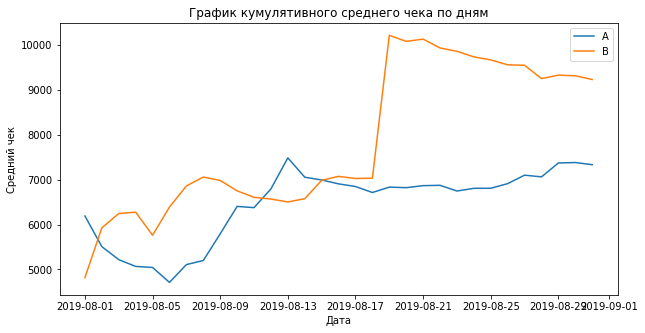

In [73]:
#графики кумулятивного среднего чека по дням
plt.figure(figsize=(10,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по дням')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

##### комментарий: 
по графику среднего чека видно, что средний чек группы В был выше всегда, кроме 13 августа (когда произошла крупная покупка в группе А, что позволило сравняться графикам в выручке), далее в группе В средний чек значительно был увеличен

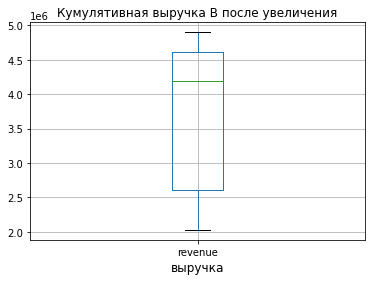

In [74]:
#хочу посмотреть что за скачок среднего чека
plotdata = cumulativeRevenueB.query('"2019-08-13" < date < "2019-08-26"').boxplot('revenue')
plt.title('Кумулятивная выручка B после увеличения', fontsize=12)
plt.xlabel('выручка', fontsize=12)
plt.show()

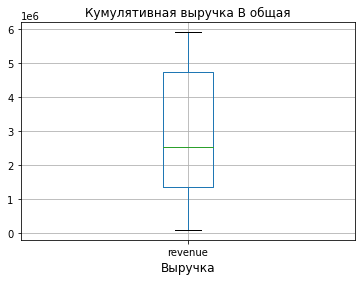

In [75]:
plotdata1 = cumulativeRevenueB.boxplot('revenue')
plt.title('Кумулятивная выручка B общая', fontsize=12)
plt.xlabel('Выручка', fontsize=12)
plt.show()

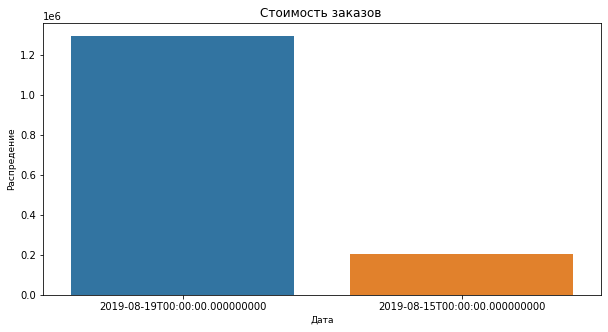

In [76]:
orders1 = orders.query('"2019-08-01" < date < "2019-08-31"')
orders2 = orders1.query('199000 < revenue < 2000000')
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot()
plt.title('Стоимость заказов ',fontsize=12)
sns.barplot(data=orders2, x='date', y='revenue')

plt.xlabel('Дата',fontsize=9)
plt.ylabel('Распредение',fontsize=9)
plt.show()

Text(0.5, 0, 'Выручка')

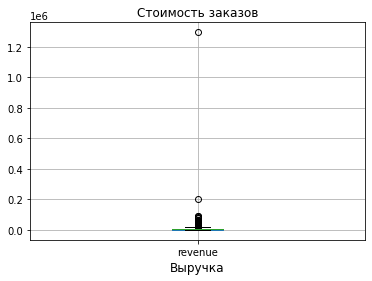

In [77]:
orders1.boxplot('revenue')
plt.title('Стоимость заказов', fontsize=12)
plt.xlabel('Выручка', fontsize=12)
#видимо с этим связан всплеск, но непонятно пока

In [78]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


еще раз убедилась, что выручка с 19 числа стала больше, как и количество заказов,  тест показал явный успех группы B, но выше обнаружены 2 заказа на большие суммы, которые также могли повлиять на анализ

Построим график относительного изменения кумулятивного среднего чека группы B к группе A

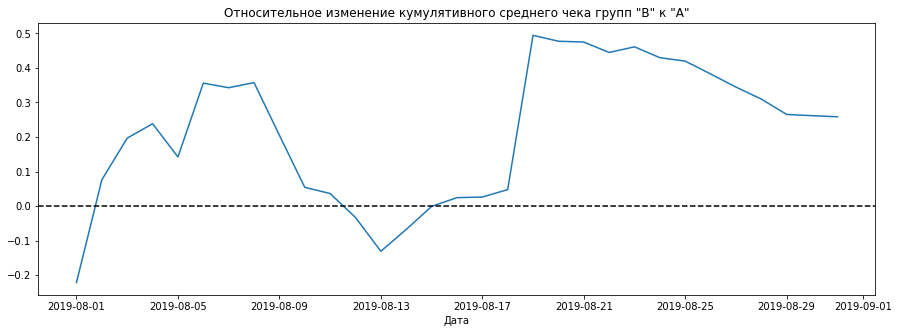

In [79]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on ='date', how='left', suffixes=['A', 'B'])
# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel ('Дата')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.show()

##### комментарий: 
график относительного изменения показал тоже самое, что и график среднего чека, поэтому выводы не поменялись

### Задача 2

- Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения. 
- Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

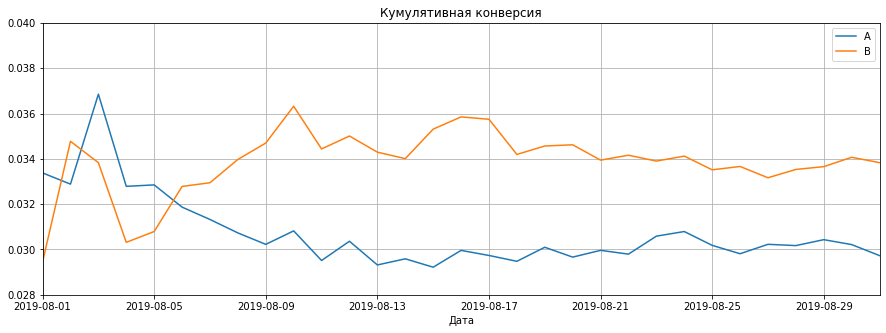

In [80]:
#Добим столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.
#Сделаем переменные, в которых  данные о заказах в сегментах A и B.
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
# отделяем данные по группе A и B
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия')

plt.grid()
plt.legend()
plt.xlabel ('Дата')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.028, 0.04])
plt.show()


##### комментарий: 
С начала месяца конверсия конверсия группы А была  больше,   после пика (3 августа) она пошла на спад, с  9 августа равномерно ниже группы В. Конверсия группы B с 4 августа пошла расти и уже 6 августа превысила конверсию A, затем пошло постепенное снижение, оставаяся при этом лучше, чем в группе А. Итого конверсия группы B лучше.

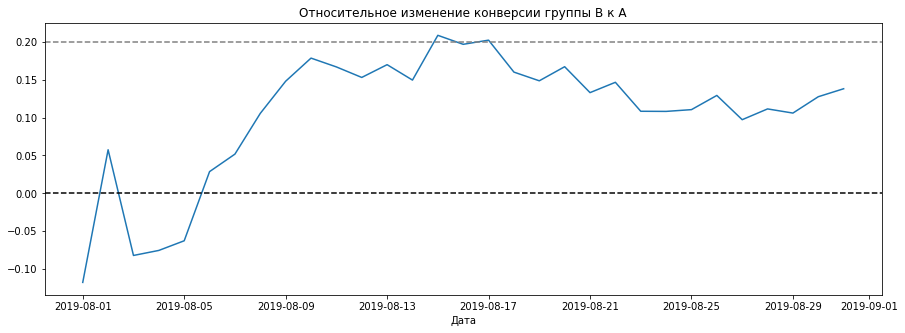

In [81]:

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#график относительного различия конверсии
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('Относительное изменение конверсии группы B к А')

plt.xlabel ('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.show()


Максимальная конверсия B росла c 6 августа до 15 августа и разница с "A"  составила около 20%, затем пошло постепенное снижение отностельной конверсии до 10%-12%.

### Задача 3 - проверка аномалий

- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [82]:
ordersByUsers = orders.drop(['revenue', 'date', 'group'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending = False)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


Text(0.5, 0, 'Пользователи')

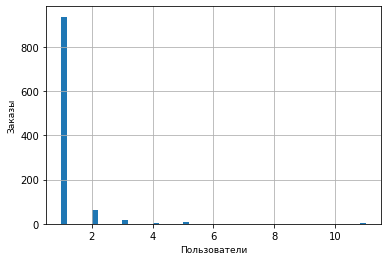

In [83]:
## гистограмма распределения числа заказов по пользователям методом hist()
ordersByUsers['orders'].hist(bins=50)
plt.ylabel('Заказы',fontsize=9)
plt.xlabel('Пользователи',fontsize=9)

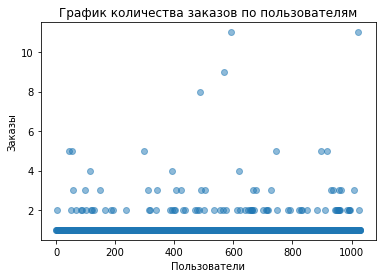

In [84]:
#точечный график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5) 
plt.title('График количества заказов по пользователям')
plt.xlabel ('Пользователи')
plt.ylabel ('Заказы')
plt.show()

In [85]:
print('95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [ 95, 99]))

95 и 99 перцентили по заказам :  [2. 4.]


##### комментарий: 
В основном у пользователей по 1 заказу, достаточно тех кто делает 2. Тех кто совершил 4 и более (есть те кто более 10) очень мало, после расчета перцентилей уточнили, что не более 1% заказов больше 4-х (можно принять за выбросы)

### Задача 4 - проверка аномалий 
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

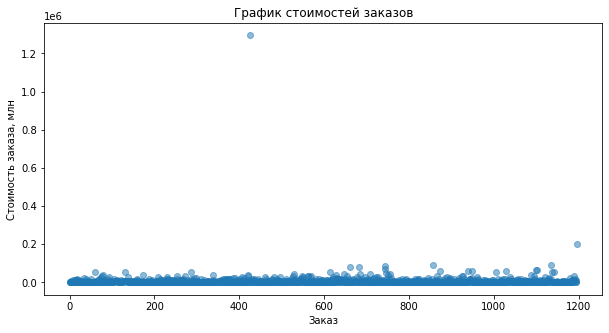

In [97]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5);
plt.xlabel ('Заказ')
plt.ylabel ('Стоимость заказа, млн')
plt.show()

In [87]:
print('95 и 99 перцентили по заказам : ', np.percentile(orders['revenue'], [ 95, 99]))

95 и 99 перцентили по заказам :  [28000.  58233.2]


##### комментарий: 
Один заказ > 1,2 млн (это тот всплеск, что ранее был виден на графике чека), еще один заказ на 200 млн. Остальные заказы более равномерно распределены по стоимости, не более 1% более 58 233, поэтому все что выше будем считать аномалией.

###  Задача 5 
- Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [88]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277



Применим критерий манна уитни, отформатируем p-value. В sampleA и sampleB сохраним выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA/sampleB — это количество пользователей, сумма всех элементов — количество заказов. 
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. 

сформирую гипотезу:
H0 - статистически значимых различий в конверсии между группами нет; 
H1 - статистически значимые различия есть.

In [89]:
#для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (orders[orders['group'] =='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

#Объявим переменные, в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
print("p-value {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])) #берем количество заказов
print(
    "Относительный прирост конверсии В {0:.3f}".format(
        (data['ordersPerDateB'].sum() / data['visitorsPerDateB'].sum())
        / (data['ordersPerDateA'].sum() / data['visitorsPerDateA'].sum())
        - 1
    )
)

p-value 0.01679
Относительный прирост конверсии В 0.138


##### комментарий:  
p-value меньше 0.05, а значит отвергаем нулевую гипотезу и статистически значимые различия есть. Относительный прирост конверсии группы В над А 13,8%.

In [90]:
print('p-value {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный показатель В к А {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.729
Относительный показатель В к А 0.259


##### комментарий:  
p-value > 0.05, а значит статистических различий в среднем чеке при условии всех данных "сырых" -  нет. Хотя прирост по среднему чеку в группе B на 26%, плюс выше мы уже рассматривали данные, по которым видно, что чек выше

###  Задача 6 - статическая значимость различий по данным без выбросов
- Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

ранее уже был комментарий, что считаем аномальными пользователей кто сделал больше 4 заказов, пользователей, сумма заказа которых дороже  58233

In [91]:
ordersByUsersA

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [92]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] >4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()


In [93]:
#всего аномальных пользователей
abnormalUsers.shape[0]

15

In [94]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('p-value {0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии В {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.01438
Относительный прирост конверсии В 0.153


##### комментарий:  
По «очищенным» данным 0,014 < 0,05, (alpha), а значит различия в конверсии групп A и B есть (отвергаем гипотезу что статистических различий нет). Относительный прирост группы "B" над "A" равен 15,3% (выше, чем с «сырыми» данными - 13.8%) . Но и ранее по сырым данным мы также определили что различия в группе А и B есть.

посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [95]:
print(
    ' p-value {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель B к А {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

 p-value 0.851
Относительный показатель B к А -0.006


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Относительный показатель отрицательный - а значит средний чек в группе B оказался немного ниже, значит ранее повлияли 2 больших заказа на данные.

###  Задача 6 - решение по тесту

Для принятия решения по тесту необходимо понимать точное определение тестируемой гипотезы. Наиболее перспективная гипотеза по ICE (влияние, уверенность, усилия) - это "Запустить акцию, дающую скидку на товар в день рождения". Если я правильно поняла, то с помощью метода RICE мы определили тестируемую гипотезу ( Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). Выбран метод RICE так как он включает дополнительно и оценку влияния на пользователя (сколько пользователей затронет гипотеза), что по моему мнению более верно.

- По полученным данным комулятивной выручки и кумулятивного среднего чека определен явный лидер - группа B. В том числе конверсия и влияет на количество заказов, которых в группе B будет больше
- И по "сырым" и по "очищенным" данным различия в конверсии групп A и B есть. Относительный выигрыш группы "B" над "A" равен 15,3% по "очищенным" и 13.8% по "сырым" данным.
- В среднх чеках статистических различий определено, что нет. При этом по сырым данным средний чек в группе B выше почти на 26% за счет 2-х крупных заказов. По очищенным данным оказалось, что средний чек в группе В немного ниже. Но количество заказов постепенно увеличивалось с момента проведения теста, что повлияло на увеличение выручки.

Учитывая, что гипотеза не ставила целью повлиять на чек, считаю что тест можно остановить и признать успешным на основании данных группы B.